In [103]:
# import required libraries
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import re

In [104]:
# read the data
df=pd.read_csv("ecommerce_clickstream_transactions.csv")
df

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN
...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,purchase
74813,1000,10,2024-03-29 04:09:32.514318,logout,NaN,NaN,NaN
74814,1000,10,2024-02-09 02:58:56.128697,login,NaN,NaN,NaN
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,purchase


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [106]:
df.shape

(74817, 7)

In [107]:
df_cleaned = df.dropna()

In [108]:
# Replace NaN values with 0
df_filled = df.fillna(0)

In [109]:
# Extract numeric characters from the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].str.extract(r'(\d+)')

print(df)

       UserID  SessionID Timestamp     EventType  ProductID      Amount  \
0           1          1      2024     page_view        NaN         NaN   
1           1          1      2024     page_view        NaN         NaN   
2           1          1      2024  product_view  prod_8199         NaN   
3           1          1      2024   add_to_cart  prod_4112         NaN   
4           1          1      2024   add_to_cart  prod_3354         NaN   
...       ...        ...       ...           ...        ...         ...   
74812    1000         10      2024      purchase  prod_1238  186.208225   
74813    1000         10      2024        logout        NaN         NaN   
74814    1000         10      2024         login        NaN         NaN   
74815    1000         10      2024      purchase  prod_2515  198.757849   
74816    1000         10      2024        logout        NaN         NaN   

        Outcome  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4        

In [110]:
# transform attributes with textual values in numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['EventType' ] = le.fit_transform(df['EventType'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)
df['ProductID' ] = le.fit_transform(df['ProductID'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)
df['Amount' ] = le.fit_transform(df['Amount'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)
df['Outcome' ] = le.fit_transform(df['Outcome'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)
print(df)


{'add_to_cart': 0, 'click': 1, 'login': 2, 'logout': 3, 'page_view': 4, 'product_view': 5, 'purchase': 6}
{'prod_1000': 0, 'prod_1001': 1, 'prod_1002': 2, 'prod_1004': 3, 'prod_1005': 4, 'prod_1006': 5, 'prod_1007': 6, 'prod_1008': 7, 'prod_1009': 8, 'prod_1010': 9, 'prod_1011': 10, 'prod_1012': 11, 'prod_1013': 12, 'prod_1014': 13, 'prod_1015': 14, 'prod_1016': 15, 'prod_1017': 16, 'prod_1018': 17, 'prod_1019': 18, 'prod_1020': 19, 'prod_1021': 20, 'prod_1022': 21, 'prod_1023': 22, 'prod_1024': 23, 'prod_1025': 24, 'prod_1026': 25, 'prod_1027': 26, 'prod_1028': 27, 'prod_1029': 28, 'prod_1030': 29, 'prod_1031': 30, 'prod_1032': 31, 'prod_1033': 32, 'prod_1034': 33, 'prod_1035': 34, 'prod_1036': 35, 'prod_1037': 36, 'prod_1038': 37, 'prod_1039': 38, 'prod_1040': 39, 'prod_1041': 40, 'prod_1042': 41, 'prod_1043': 42, 'prod_1044': 43, 'prod_1045': 44, 'prod_1046': 45, 'prod_1047': 46, 'prod_1048': 47, 'prod_1049': 48, 'prod_1050': 49, 'prod_1051': 50, 'prod_1052': 51, 'prod_1053': 52, 'p

In [111]:
'''
# transform and print the mapping
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(5): 
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(mapping)
print(df)
'''

'\n# transform and print the mapping\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nfor i in range(5): \n    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])\n    mapping = dict(zip(le.classes_, range(len(le.classes_))))\n    print(mapping)\nprint(df)\n'

In [112]:
# define the features and target variable
x = df.iloc[:, -4:]
y = df.iloc[:, -1] 
print(x.shape)
print(y.shape)

(74817, 4)
(74817,)


In [113]:
# split the training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [114]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(59853, 4)
(59853,)
(14964, 4)
(14964,)


In [115]:
y_train

31970    1
20807    1
48839    1
73504    1
23139    1
        ..
20609    0
21440    1
73349    1
50057    1
5192     1
Name: Outcome, Length: 59853, dtype: int32

In [116]:
# build and train decision tree model
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DC=DecisionTreeClassifier(criterion='gini') # criterion='entropy'
DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [117]:
print("Actual Values:")
print(y_test)
print("Predicted values:")
print(y_pred)

Actual Values:
44898    1
18782    1
53523    1
62767    1
70655    1
        ..
4141     1
45976    1
58457    1
10895    1
68953    0
Name: Outcome, Length: 14964, dtype: int32
Predicted values:
[1 1 1 ... 1 1 0]


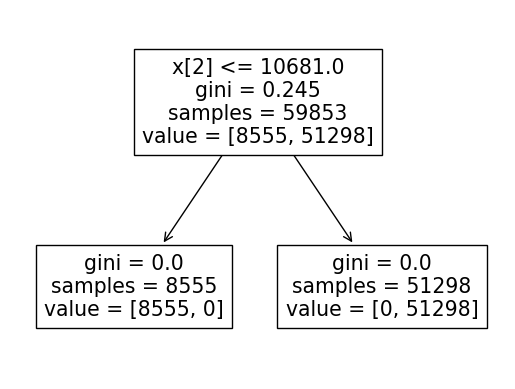

In [118]:
# plot decision tree
tree.plot_tree(DC)
plt.savefig('ecommerce_gini.pdf')

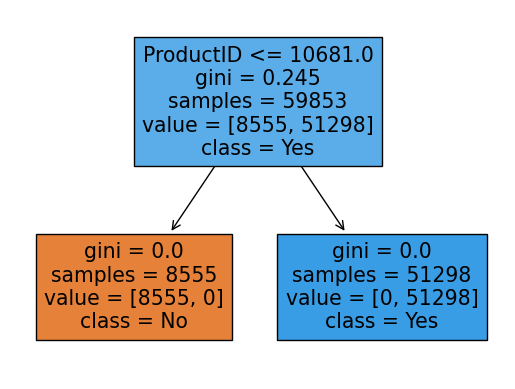

In [119]:
# generate customised decision tree with specific feature name and class name
fn=['EventType','Amount','ProductID', 'Outcome']
cn=['No', 'Yes']
tree.plot_tree(DC,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [120]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 1.0


In [121]:
cf=confusion_matrix(y_test,y_pred)

In [122]:
print(cf)

[[ 2127     0]
 [    0 12837]]


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00     12837

    accuracy                           1.00     14964
   macro avg       1.00      1.00      1.00     14964
weighted avg       1.00      1.00      1.00     14964

